In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bank_data = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')
bank_data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


## Analysing distrbutions of numerical features

In [15]:
numerical_features = [col for col in bank_data.columns if np.issubdtype(bank_data[col].dtype, np.number)]
print(numerical_features)
print(f'numerical values count is {len(numerical_features)}')

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
numerical values count is 10


In [5]:
bank_data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


/tmp/ipykernel_13794/1188799865.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col],kde_kws={'bw': 0.1})
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_13794/1188799865.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `di

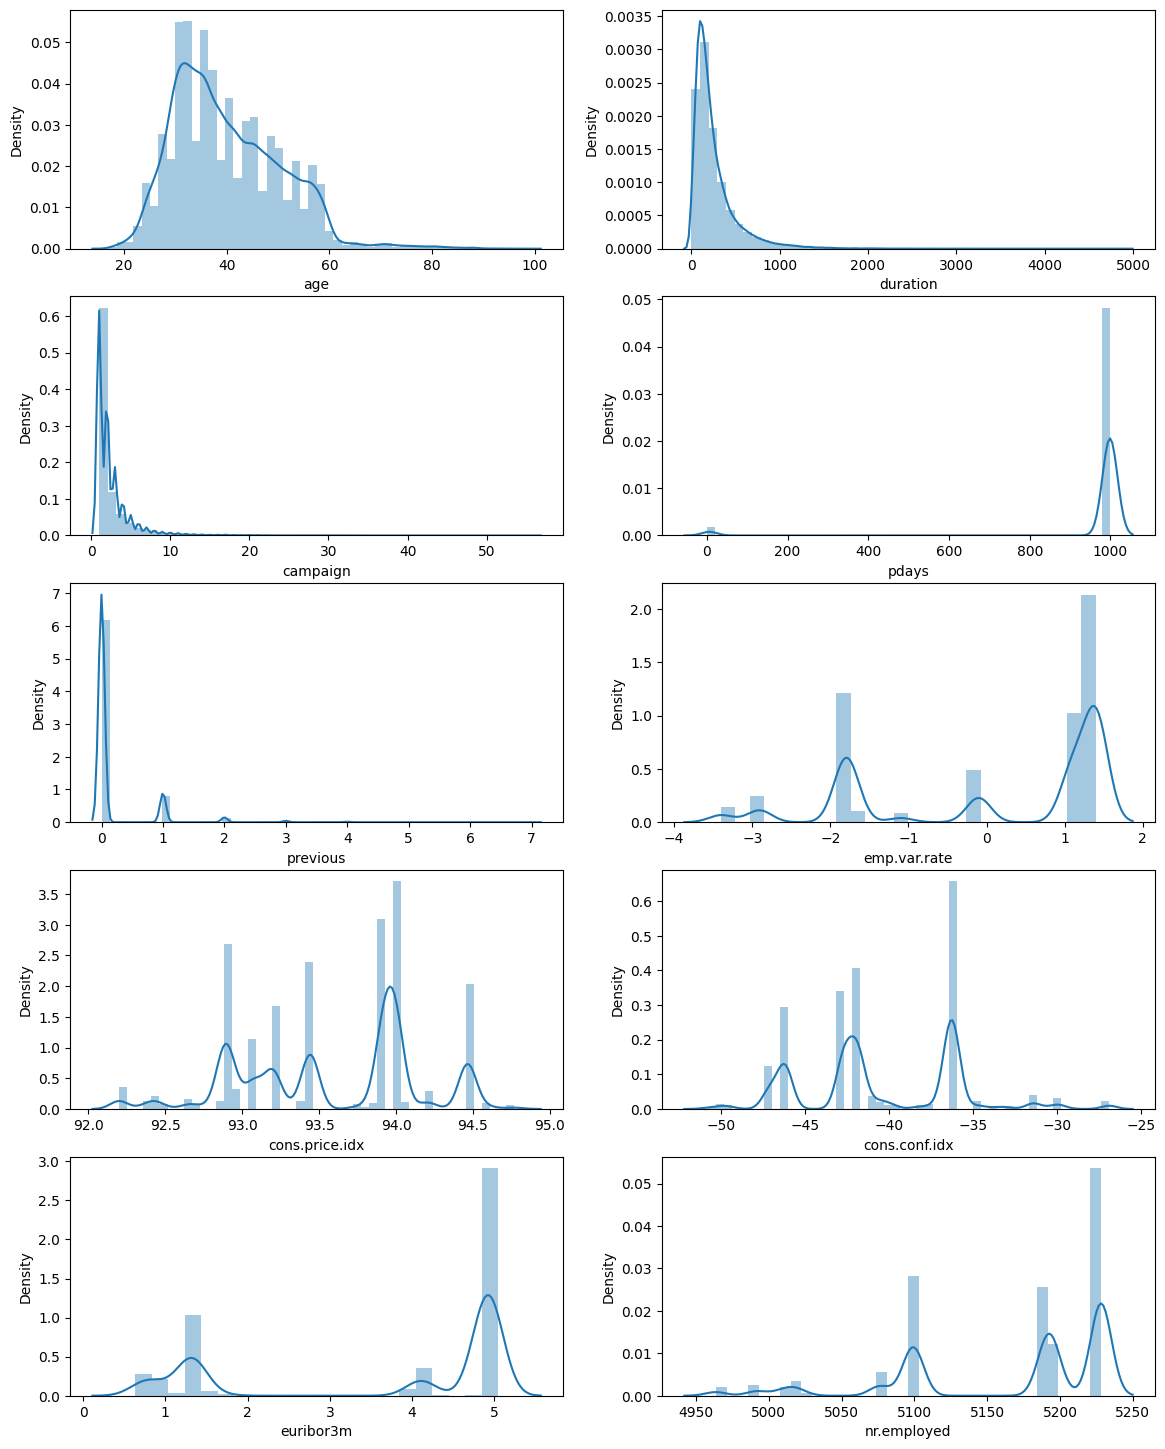

In [11]:
plt.figure(figsize=(14,18))
for index,col in enumerate(numerical_features):
    plt.subplot(5,2,index+1)
    sns.distplot(bank_data[col],kde_kws={'bw': 0.1})
plt.savefig("figs/numerical_col_distributions.png", format="png", dpi=500)

## Analysing distrbutions of categorical features

In [14]:
categorical_features = [col for col in bank_data.columns if pd.api.types.is_string_dtype(bank_data[col])]
print(categorical_features)
print(f'categorical values count is {len(categorical_features)}')

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
categorical values count is 11


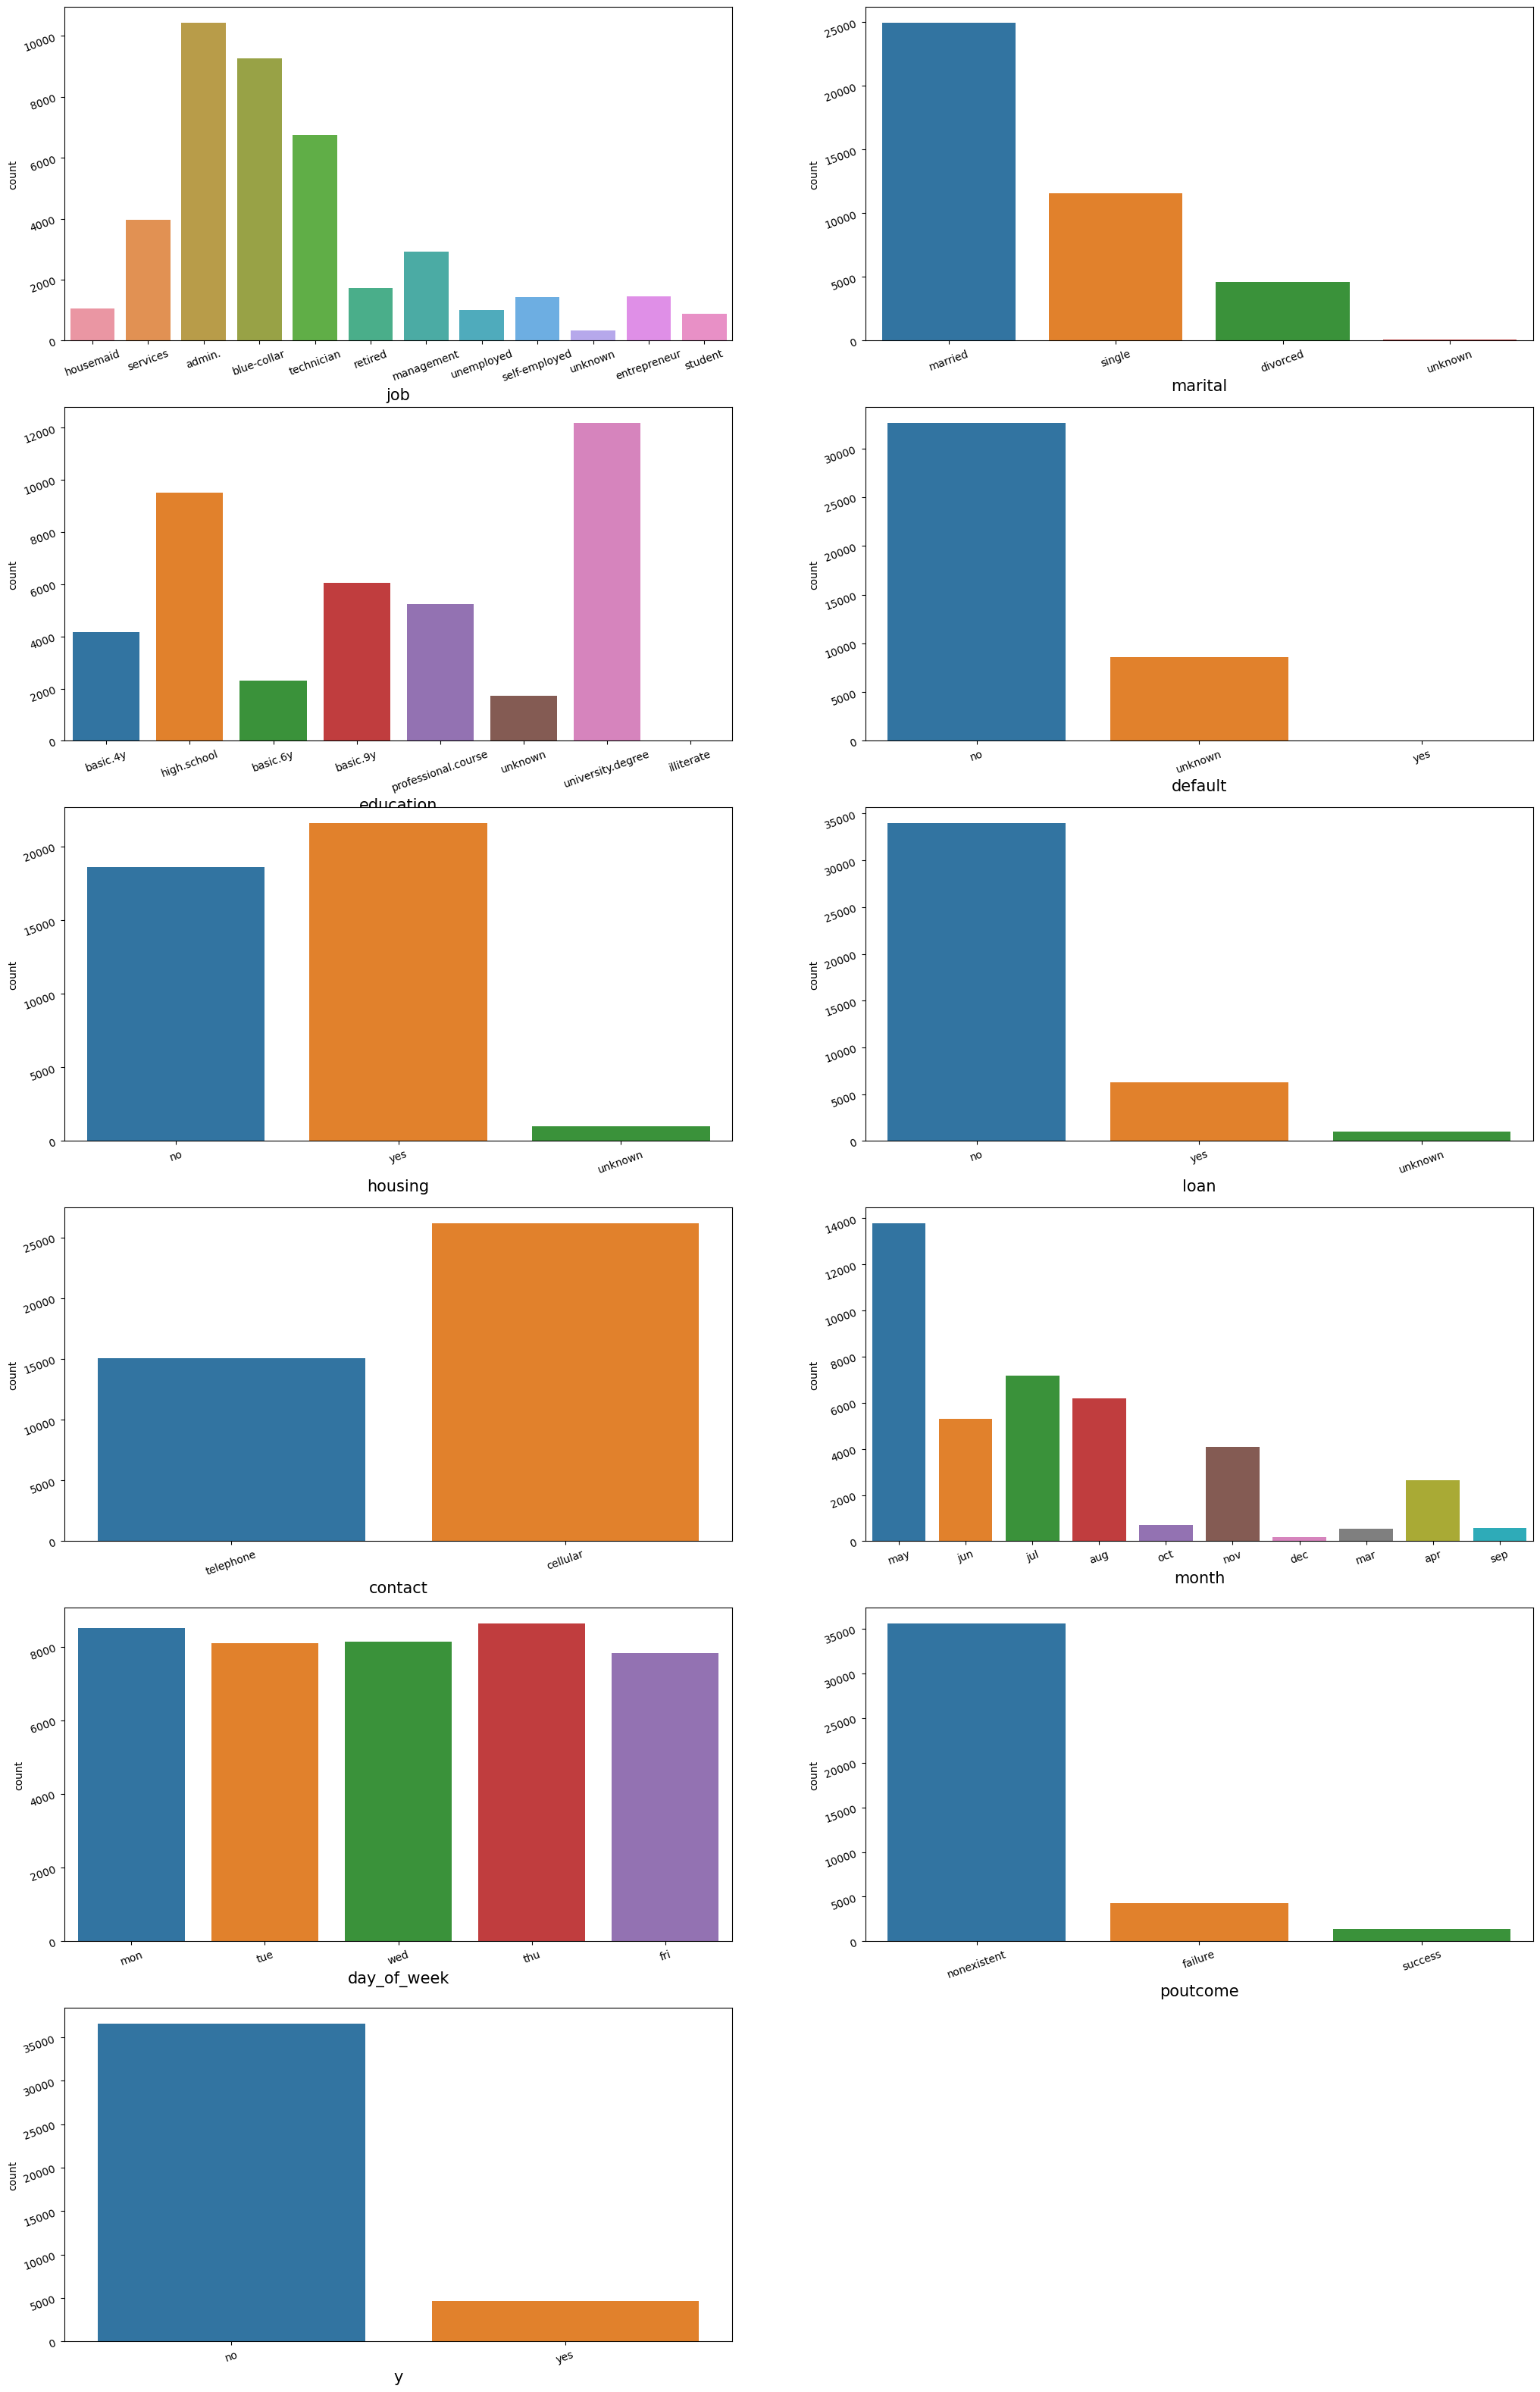

In [27]:
plt.figure(figsize=(25,40))
for index,col in enumerate(categorical_features):
    plt.subplot(6,2,index+1)
    ax = sns.countplot(x=col , data=bank_data)
    ax.set_xlabel(col,fontsize=15)
    ax.tick_params(labelsize = 10,labelrotation = 20)
plt.savefig("figs/categorical_features_counts.png", format="png", dpi=500)

In [30]:
print(f'Total number of entries: {len(bank_data)}')
print(bank_data['y'].value_counts(ascending=True))
print()
print('Percentages:')
print(bank_data.y.value_counts(normalize=True,ascending=True)*100)

Total number of entries: 41188
yes     4640
no     36548
Name: y, dtype: int64

Percentages:
yes    11.265417
no     88.734583
Name: y, dtype: float64


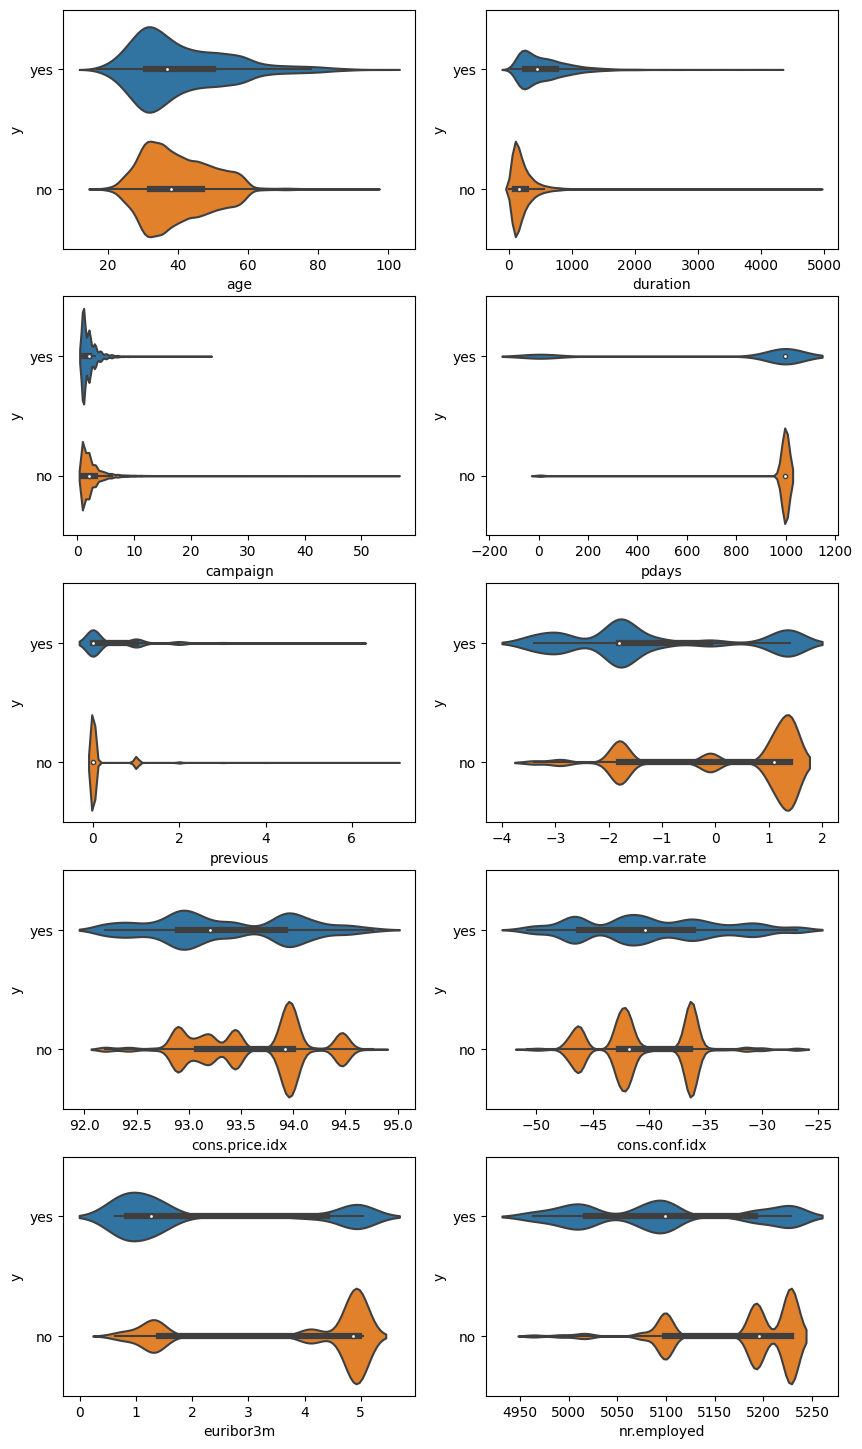

In [36]:
plt.figure(figsize=(10,18))
for index,col in enumerate(numerical_features):
    plt.subplot(5,2,index+1)
    sns.violinplot(data=bank_data,x=col,y='y', order=['yes','no'])
plt.savefig('figs/violin_plots_numerical_features.png',format="png", dpi=500)

In [40]:
from scipy.stats import ttest_ind
"""
define function for computing mean of column for yes and no cases,
as well as the test statistics and pvalue for equality of means test
"""
def test_means(data, col):
    yes_mask = data["y"] == "yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()
    ttest_res = ttest_ind(values_yes, values_no)
    return [col, mean_yes, mean_no, \
        round(ttest_res[0], 4), round(ttest_res[1],4)]

In [44]:
test_df = pd.DataFrame(columns=['column','mean yes','mean no','ttest stat','ttest pval'])
for index,col in enumerate(numerical_features):
    test_df.loc[index] = test_means(bank_data,col)
test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,age,40.913147,39.911185,6.1721,0.0
1,duration,553.191164,220.844807,89.9672,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0
4,previous,0.492672,0.132374,48.0027,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0


### The average value for successful marketing campaigns is significantly different than the average value for unsuccessful marketing campaigns.

In [45]:
from scipy.stats import ks_2samp

def test_ks(data,col):
    yes_mask = data['y'] == 'yes'
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]

    kstest_res = ks_2samp(values_yes,values_no)
    return [col,round(kstest_res[0],4),round(kstest_res[1],4)]

In [46]:
test_df2 = pd.DataFrame(columns=['column','ks stat','ks pval'])
for index,col in enumerate(numerical_features):
    test_df2.loc[index] = test_ks(bank_data,col)

test_df2 

,column,ks stat,ks pval
0,age,0.0861,0.0
1,duration,0.4641,0.0
2,campaign,0.0808,0.0
3,pdays,0.1934,0.0
4,previous,0.2102,0.0
5,emp.var.rate,0.4324,0.0
6,cons.price.idx,0.2281,0.0
7,cons.conf.idx,0.1998,0.0
8,euribor3m,0.4326,0.0
9,nr.employed,0.4324,0.0


### There's a significant difference between successful and unsuccessful marketing campaigns.

## We are going to divivde the numerical features into two groups
### group1 compaign-related features [age, duration, campaign, previous]
### group2 financial features [emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m]

In [51]:
campaign_columns = ['age', 'duration', 'campaign', 'previous']
financial_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

<Figure size 1000x1000 with 0 Axes>

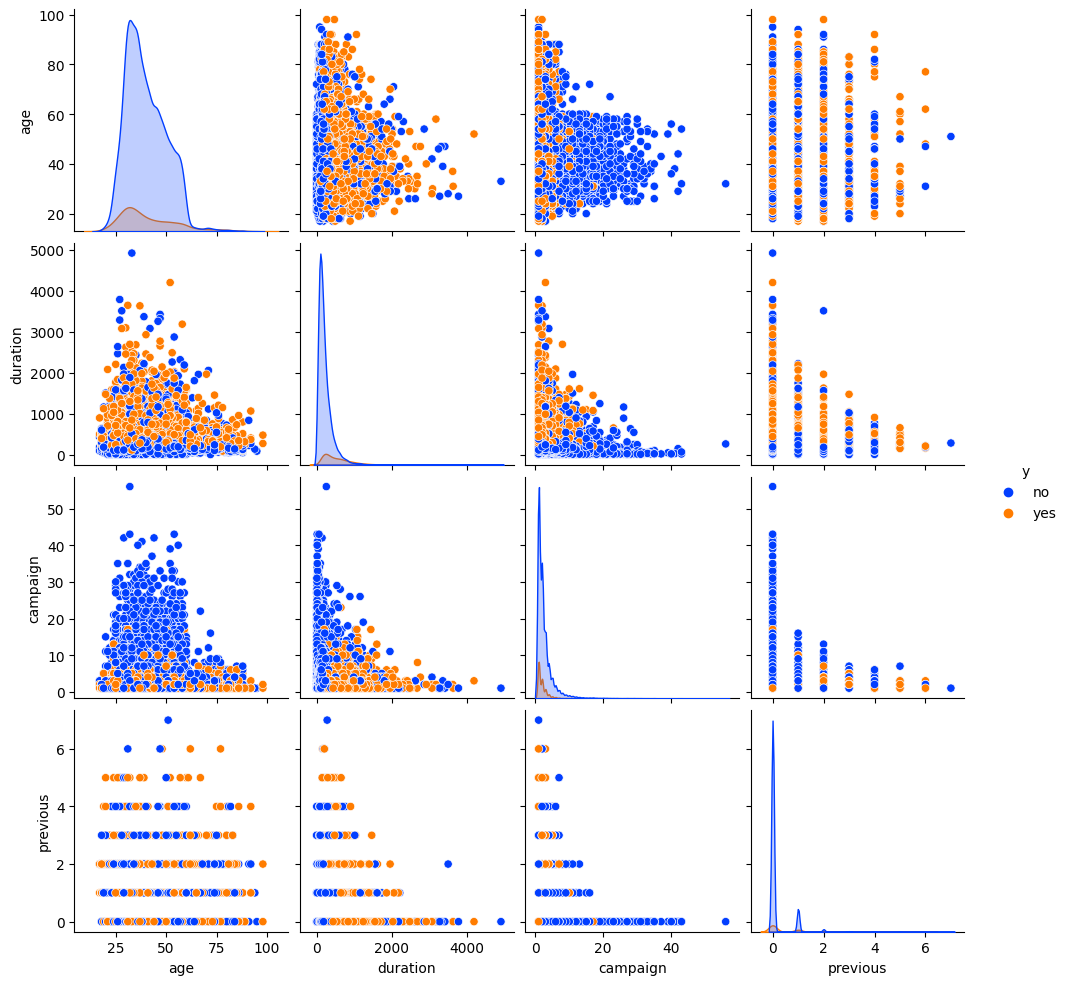

In [52]:
plot_data = bank_data[campaign_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright")
plt.savefig("figs/pairplot_campaign.png", format="png", dpi=300)

<Figure size 1000x1000 with 0 Axes>

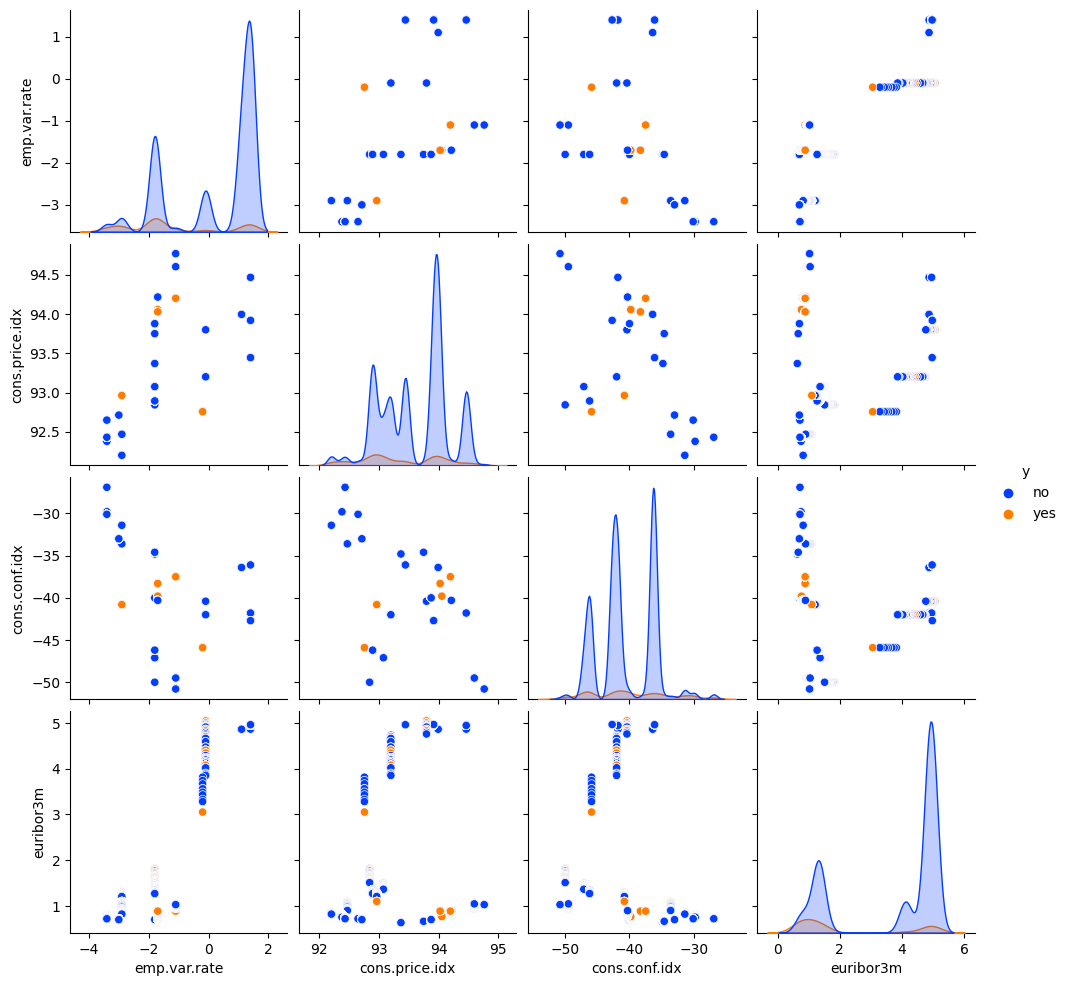

In [53]:
plot_data = bank_data[financial_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright")
plt.savefig("figs/pairplot_financial.png", format="png", dpi=300)

In [56]:
successful_calls = bank_data['y'] == 'yes'
plot_data = bank_data[campaign_columns + financial_columns][successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_13794/3993010346.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,-0.06,-0.01,0.07,-0.08,-0.02,0.14,-0.09
duration,-0.06,1.00,0.16,-0.23,0.50,0.24,-0.14,0.50
campaign,-0.01,0.16,1.00,-0.10,0.22,0.12,-0.04,0.21
previous,0.07,-0.23,-0.10,1.00,-0.28,0.09,0.13,-0.39
emp.var.rate,-0.08,0.50,0.22,-0.28,1.00,0.66,-0.27,0.93
cons.price.idx,-0.02,0.24,0.12,0.09,0.66,1.00,-0.33,0.41
cons.conf.idx,0.14,-0.14,-0.04,0.13,-0.27,-0.33,1.00,-0.12
euribor3m,-0.09,0.50,0.21,-0.39,0.93,0.41,-0.12,1.00


In [57]:
unsuccessful_calls = bank_data['y'] == 'no'
plot_data = bank_data[campaign_columns + financial_columns][unsuccessful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_13794/3493476667.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  unsuccessful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,0.00,0.01,-0.00,0.03,0.01,0.12,0.04
duration,0.00,1.00,-0.08,-0.00,0.00,0.02,0.00,0.01
campaign,0.01,-0.08,1.00,-0.07,0.13,0.12,-0.01,0.12
previous,-0.00,-0.00,-0.07,1.00,-0.42,-0.27,-0.14,-0.44
emp.var.rate,0.03,0.00,0.13,-0.42,1.00,0.80,0.32,0.98
cons.price.idx,0.01,0.02,0.12,-0.27,0.80,1.00,0.15,0.73
cons.conf.idx,0.12,0.00,-0.01,-0.14,0.32,0.15,1.00,0.39
euribor3m,0.04,0.01,0.12,-0.44,0.98,0.73,0.39,1.00


In [58]:
diff_corr = successful_corr - unsuccessful_corr
diff_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_13794/1972923603.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  diff_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,0.00,-0.06,-0.02,0.08,-0.11,-0.04,0.02,-0.13
duration,-0.06,0.00,0.24,-0.23,0.50,0.22,-0.15,0.49
campaign,-0.02,0.24,0.00,-0.04,0.09,-0.01,-0.04,0.10
previous,0.08,-0.23,-0.04,0.00,0.14,0.36,0.27,0.05
emp.var.rate,-0.11,0.50,0.09,0.14,0.00,-0.14,-0.59,-0.05
cons.price.idx,-0.04,0.22,-0.01,0.36,-0.14,0.00,-0.48,-0.32
cons.conf.idx,0.02,-0.15,-0.04,0.27,-0.59,-0.48,0.00,-0.51
euribor3m,-0.13,0.49,0.10,0.05,-0.05,-0.32,-0.51,0.00
